### Задание 2.1
#### Рассчитайте максимальный возраст (max_age) кандидата в таблице.

In [ ]:
SELECT
    max(age)
FROM hh.candidate
# Максимальный возраст кандидата в таблице 100 лет

### Задание 2.2
#### Теперь давайте рассчитаем минимальный возраст (min_age) кандидата в таблице.

In [ ]:
SELECT
    min(age)
FROM hh.candidate
# Минимальный возраст кандидата в таблице 14 лет

#### Какие выводы мы можем сделать? Если 14 лет в качестве минимального значения возраста хоть как-то может претендовать на адекватность, то 100 лет в качестве значения максимального возраста — это явно какая-то ошибка.

### Задание 2.3
#### Попробуем «почистить» данные. Напишите запрос, который позволит посчитать для каждого возраста (age) сколько (cnt) человек этого возраста у нас есть.
#### Отсортируйте результат по возрасту в обратном порядке.

In [ ]:
SELECT *
FROM hh.candidate_timetable_type
ORDER BY candidate_id desc

### Задание 2.4
#### По данным Росстата, средний возраст занятых в экономике России составляет 39.7 лет. Мы округлим это значение до 40. Найдите количество кандидатов, которые старше данного возраста. Не забудьте отфильтровать «ошибочный» возраст 100.

In [ ]:
SELECT
    COUNT(ID)
FROM hh.candidate
WHERE age BETWEEN 41 AND 99
# 6263

#### ВЫВОДЫ: Количество кандидатов в возврасте от 40 до 99 лет занятые в экономике России составляет - 6263 человек.

### Задание 3.1
#### Для начала напишите запрос, который позволит узнать, сколько (cnt) у нас кандидатов из каждого города (city).
- Формат выборки: city, cnt.
- Группировку таблицы необходимо провести по столбцу - title, результат отсортируйте по количеству в обратном порядке.

In [ ]:
SELECT
    ct.title city,
    count(*) cnt
FROM hh.city ct
JOIN hh.candidate cnd ON ct.id=cnd.city_id
GROUP BY city
ORDER BY cnt DESC 

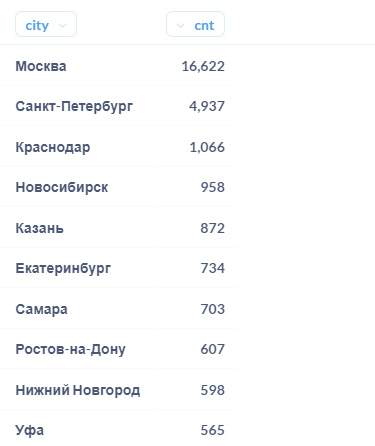

### Задание 3.2
#### Москва бросается в глаза как, пожалуй, самый активный рынок труда. Напишите запрос, который позволит понять, каких кандидатов из Москвы устроит «проектная работа».
- Формат выборки: gender, age, desirable_occupation, city, employment_type.
- Отсортируйте результат по id кандидата.

In [ ]:
select
    p.gender, p.age, p.desirable_occupation, c.title, p.employment_type
    from hh.candidate as p
    join hh.city as c on c.id = p.city_id
    where p.employment_type like '%проектная работа%'
    and c.title = 'Москва'
order by p.id

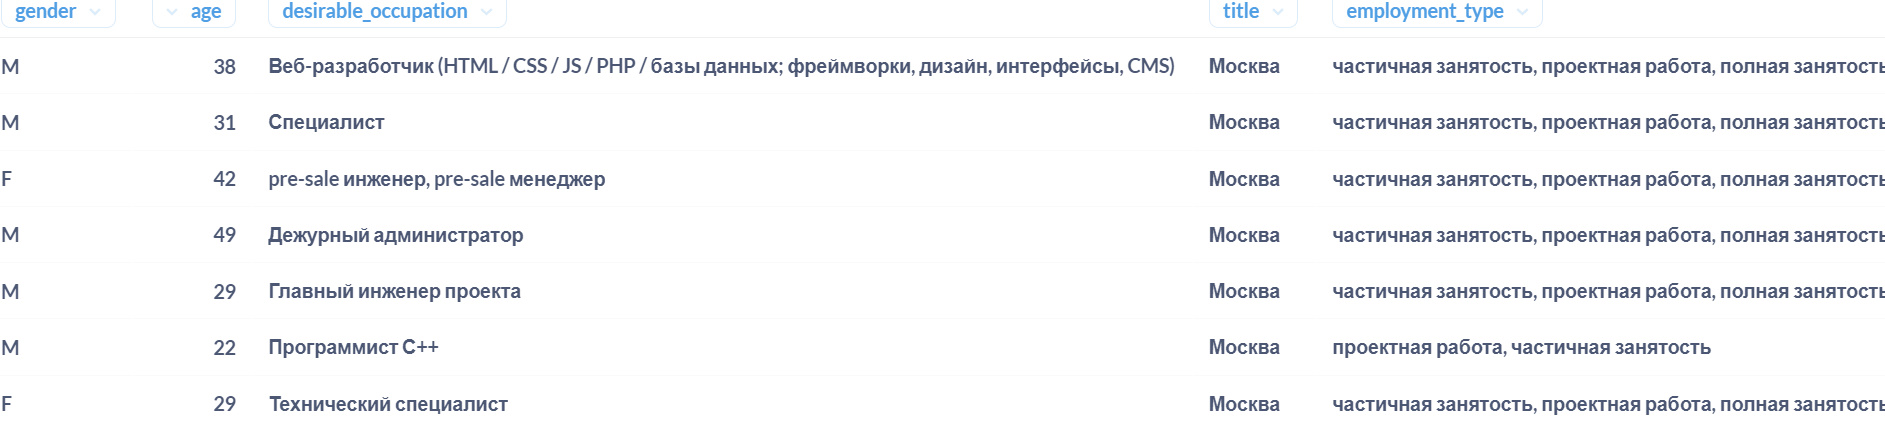

### Задание 3.3
#### Данных оказалось многовато. Отфильтруйте только самые популярные IT-профессии — разработчик, аналитик, программист.
- Обратите внимание, что данные названия могут быть написаны как с большой, так и с маленькой буквы.
- Отсортируйте результат по id кандидата.

In [ ]:
select 
    p.gender, p.age, p.desirable_occupation, c.title as city, p.employment_type
    from hh.candidate as p
    join hh.city as c on c.id = p.city_id
    where p.employment_type like '%проектная работа%'
    and c.title = 'Москва'
    and p.desirable_occupation ilike any (array['%разработчик%', '%аналитик%', '%программист%'])
order by p.id

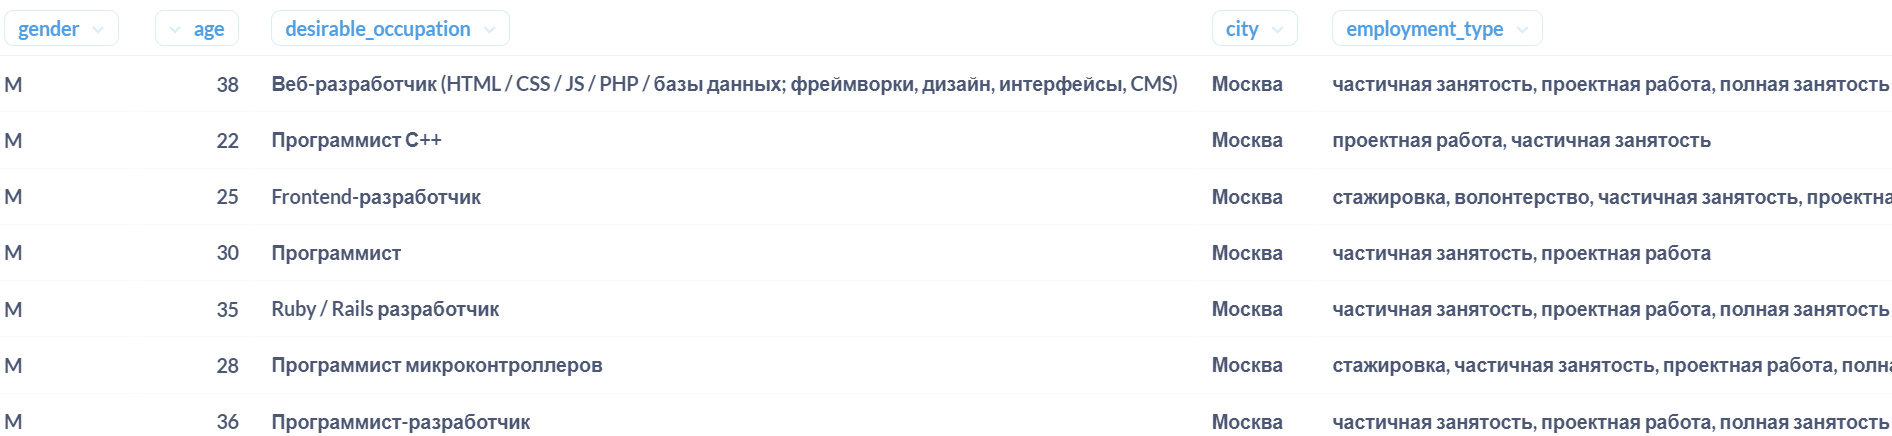

### Задание 3.4
#### Для общей информации попробуйте выбрать номера и города кандидатов, у которых занимаемая должность совпадает с желаемой.
- Формат выборки: id, city.
- Отсортируйте результат по городу и id кандидата.

In [ ]:
select 
     cnd.id, ct.title
from hh.candidate cnd 
    join hh.city ct on cnd.city_id = ct.id
where cnd.desirable_occupation = cnd.current_occupation 
group by ct.title, cnd.id
order by ct.title, cnd.id 

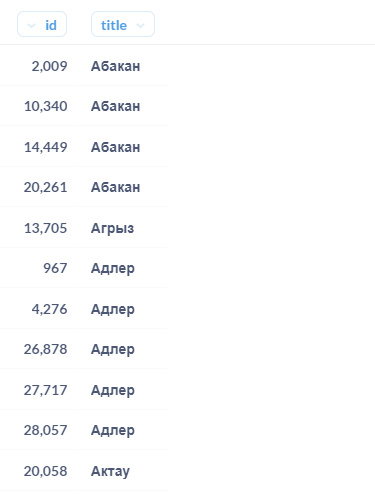

### Задание 3.5
#### Определите количество кандидатов пенсионного возраста.
- Пенсионный возраст для мужчин наступает в 65 лет, для женщин — в 60 лет.

In [ ]:
select
    count(*), 'М' as gender
    from hh.candidate as p
    where p.gender = 'M'
    and (p.gender ='M' and p.age >=65) and (p.age < 100)

union

select
    count(*), 'F' as gender
    from hh.candidate as p
    where p.gender = 'F'
    and p.age >= 60

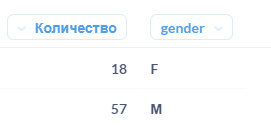

####  ОТВЕТ: 75 кандидатов пенсионного возраста  

### Задание 4.1
#### Для добывающей компании нам необходимо подобрать кандидатов из Новосибирска, Омска, Томска и Тюмени, которые готовы работать вахтовым методом.
- Формат выборки: gender, age, desirable_occupation, city, employment_type, timetable_type.
- Отсортируйте результат по городу и номеру кандидата.

In [ ]:
c.desirable_occupation, 
t.title city, 
c.employment_type, 
ti.title timetable_type
from hh.candidate c join hh.city t on t.id = c.city_id
    join hh.CANDIDATE_TIMETABLE_TYPE ct on ct.candidate_id = c.city_id
    join hh.TIMETABLE_TYPE ti on ti.id = ct.timetable_id
    
--group by city, c.gender, c.desirable_occupation, c.age, c.employment_type, timetable_type
--having t.title like 'Т%'
--order by t.title
where (t.title = 'Новосибирск' or t.title = 'Омск' or t.title = 'Томск' or t.title = 'Тюмень') 
      and ti.title = 'вахтовый метод'

### Задание 4.2
#### Для заказчиков из Санкт-Петербурга нам необходимо собрать список из 10 желаемых профессий кандидатов из того же города от 16 до 21 года (в выборку включается 16 и 21, сортировка производится по возрасту) с указанием их возраста, а также добавить строку - Total с общим количеством таких кандидатов. 
- Напишите запрос, который позволит получить выборку вида:
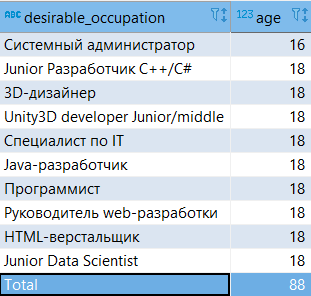

In [ ]:
(SELECT
ca.desirable_occupation,
ca.age

FROM hh.candidate ca
JOIN hh.city ci ON  ca.city_id=ci.id
WHERE ci.title='Санкт-Петербург' AND ca.age BETWEEN 16 AND 21
ORDER BY 2
LIMIT 10)

UNION ALL

SELECT
'Total', COUNT(ca.id)
FROM hh.candidate ca

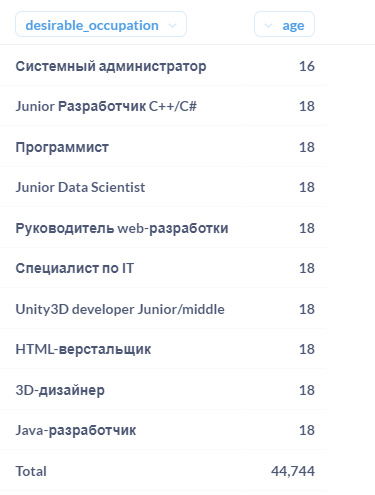